In [1]:
from __future__ import division, print_function, unicode_literals
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np

In [2]:
from skimage.io import imread
import pylab

In [3]:
image = imread('parrots.jpg')

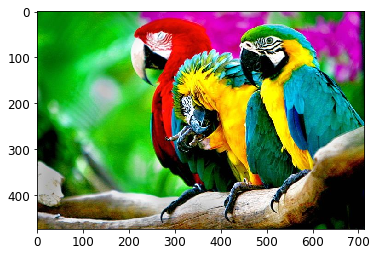

In [4]:
pylab.imshow(image)

In [5]:
##-- Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1.
from skimage import img_as_float
image_float = imread('parrots.jpg')
image_float = img_as_float(image_float)
image_float

array([[[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.21568627, 0.01568627],
        [0.        , 0.20784314, 0.01568627],
        [0.01176471, 0.21568627, 0.03529412]],

       [[0.01568627, 0.49411765, 0.01960784],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       [[0.01176471, 0.49019608, 0.01568627],
        [0.01176471, 0.49019608, 0.01568627],
        [0.00784314, 0.49411765, 0.00784314],
        ...,
        [0.        , 0.20784314, 0.01176471],
        [0.        , 0.20784314, 0.01568627],
        [0.        , 0.20392157, 0.02352941]],

       ...,

       [[0.4745098 , 0.37647059, 0.02352941],
        [0.45098039, 0.35294118, 0.        ],
        [0.45098039, 0

In [6]:
##--Создайте матрицу объекты-признаки: 
##--характеризуйте каждый пиксель тремя координатами
##--значениями интенсивности в пространстве RGB.

X = np.array(image_float.reshape((image_float.shape[0]*image_float.shape[1],3)))

In [7]:
X

array([[0.01568627, 0.49411765, 0.01960784],
       [0.01176471, 0.49019608, 0.01568627],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.08627451, 0.15686275, 0.23529412]])

In [8]:
from sklearn.cluster import KMeans

In [9]:
clust_clf = KMeans(init="k-means++", random_state=241)
clust_clf

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=241, tol=0.0001, verbose=0)

In [12]:
from skimage.metrics import peak_signal_noise_ratio
for s in range(8,21):
    kmeans=KMeans(init='k-means++',random_state=241,n_clusters=s)
    kmeans.fit(X)
    y=kmeans.labels_
    X_median=np.array(X)
    X_mean=np.array(X)
    for i in range(s):
        X_median[y==i]=np.median(X_median[y==i],axis=0)
        X_mean[y==i]=np.mean(X_mean[y==i],axis=0)
    image_median=X_median.reshape(image_float.shape[0],image_float.shape[1],3)
    image_mean=X_mean.reshape(image_float.shape[0],image_float.shape[1],3)
    PSNR_median = peak_signal_noise_ratio(image_float, image_median)
    PSNR_mean = peak_signal_noise_ratio(image_float, image_mean)
    print('n_clusters= ' + str(s) + 
          " PSNR_median= " +  str(PSNR_median) + 
          " PSNR_mean=" + str(PSNR_mean))
    if PSNR_median > 20 or PSNR_mean > 20:
        break

n_clusters= 8 PSNR_median= 18.175411416257003 PSNR_mean=18.46814574152363
n_clusters= 9 PSNR_median= 18.850775771261343 PSNR_mean=19.144853580196504
n_clusters= 10 PSNR_median= 19.44607743096483 PSNR_mean=19.67480580827776
n_clusters= 11 PSNR_median= 19.88454204112774 PSNR_mean=20.163276234787073
